In [240]:
#Exploratory Data Analysis

# 💎Exploratory Data Analysis 

Dataset yang digunakan untuk proses analisis adalah data kumpulan tweet berbahasa Indonesia yang memuat label kategori Hate Speech yang terdapat pada tweet tersebut. Selain data tweet yang memuat label, terdapat juga data kata-kata abusive dan data yang memuat kamus bahasa alay yang berisi bahasa alay beserta terjemahannya.

Berikut merupakan data csv yang digunakan:

* data.csv : Dataset Tweet berbahasa Indonesia dengan label Hate Speech
* abusive.csv : Data kata-kata abusive
* new_kamusalay.csv : Data kata-kata alay beserta terjemahannya

Berikut merupakan Library Python yang digunakan dalam proses EDA:

* Pandas
* Matplotlib.pyplot
* Seaborn
* Wordcloud
* Regular Expression (RE)

In [241]:
import re
import seaborn as sns
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

Membaca Setiap Data

In [242]:
#data.csv
df_data = pd.read_csv('../csv_data/data.csv', encoding='ISO-8859-1')

#abusive.csv
df_abusive = pd.read_csv('../csv_data/abusive.csv', encoding='ISO-8859-1')

#new_kamusalay.csv
df_alay = pd.read_csv('../csv_data/new_kamusalay.csv', encoding='ISO-8859-1')

### EDA data.csv

In [243]:
#membaca 5 data teratas
print(len(df_data))
df_data.head(5)

13169


,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0


Terdapat 13.169 baris dan 13 kolom pada data.csv.

Berikut merupakan informasi dari setiap kolom:

* Tweet: Isi tweet dengan bahasa Indonesia
* HS: Label untuk Hate Speech
* Abusive: Label untuk kata-kata Abusive
* HS_Individual: HS yang ditujukan kepada individu
* HS_Group: HS yang ditujukan kepada sekelompok orang
* HS_Religion: HS yang berkaitan dengan agama/keyakinan
* HS_Race: HS yang berkaitan dengan ras/etnis
* HS_Physical: HS yang berkaitan dengan fisik/disabilitas
* HS_Gender: HS yang berkaitan dengan gender/orientasi seksual
* HS_Other: HS yang berkaitan dengan kata-kata kotor/pencemaran nama baik lainnya
* HS_Weak: HS yang lemah
* HS_Moderate: HS yang sedang
* HS_Strong: HS yang kuat

Angka 1 mewakili True dan 0 mewakili False. Artinya, baris tweet yang memuat angka 1 mengandung Label yang tertera pada nama kolom, begitupun sebaliknya.

In [244]:
#menghapus baris yang memuat duplikat pada kolom Tweet
df_data_clean = df_data.drop_duplicates(subset='Tweet')

total_df_data = len(df_data_clean)

# Banyak tweet yang mengandung HS
HS_count = len(df_data_clean.loc[df_data_clean['HS'] == 1])

# Banyak tweet yang mengandung Abusive
abusive_count = len(df_data_clean.loc[df_data_clean['Abusive'] == 1])

# Menghitung persentase data yang mengandung Hate Speech
hate_speech_percentage = (HS_count / total_df_data) * 100

# Menghitung persentase data yang mengandung Abusive
abusive_percentage = (abusive_count / total_df_data) * 100

# Menampilkan hasil
print("Jumlah baris pada data.csv setelah baris duplikat dihapus:", len(df_data_clean))
print("Jumlah data yang mengandung Hate Speech:", HS_count)
print("Jumlah data yang mengandung Abusive:", abusive_count)
print("Persentase data yang mengandung Hate Speech: {:.2f}%".format(hate_speech_percentage))
print("Persentase data yang mengandung Abusive: {:.2f}%".format(abusive_percentage))






Jumlah baris pada data.csv setelah baris duplikat dihapus: 13023
Jumlah data yang mengandung Hate Speech: 5501
Jumlah data yang mengandung Abusive: 4992
Persentase data yang mengandung Hate Speech: 42.24%
Persentase data yang mengandung Abusive: 38.33%


Setelah melalui proses data cleaning, data pada data.csv memuat 13.023 baris.

Dari data tersebut, sebanyak 5.501 (42,24%) tweet mengandung Hate Speech dan 4.992 (39,33%) tweet mengandung kata-kata Abusive

#### Selanjutnya membuat Kolom Baru yang memuat Total Label, Panjang Karakter dan Jumlah Kata dari setiap tweet

In [245]:
# Kolom baru untuk panjang karakter tweet
df_data_clean['Panjang Tweet'] = df_data_clean['Tweet'].apply(lambda x: len(str(x)))

# Kolom baru untuk jumlah kata dalam tweet
df_data_clean['Jumlah Kata'] = df_data_clean['Tweet'].apply(lambda x: len(str(x).split()))

# Kolom baru "Total Label" dengan menghitung jumlah tweet yang bernilai 1 di setiap kolom
df_data_clean['Total Label'] = df_data_clean[['HS', 'Abusive', 'HS_Individual', 'HS_Group', 'HS_Religion', 'HS_Race', 'HS_Physical', 'HS_Gender', 'HS_Other', 'HS_Weak', 'HS_Moderate', 'HS_Strong']].sum(axis=1)



# Menampilkan DataFrame dengan kolom baru
df_data_clean.head(10)

C:\Users\mfthr\AppData\Local\Temp\ipykernel_14572\401810501.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data_clean['Panjang Tweet'] = df_data_clean['Tweet'].apply(lambda x: len(str(x)))
C:\Users\mfthr\AppData\Local\Temp\ipykernel_14572\401810501.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data_clean['Jumlah Kata'] = df_data_clean['Tweet'].apply(lambda x: len(str(x).split()))
C:\Users\mfthr\AppData\Local\Temp\ipykernel_14572\401810501.py:8: SettingWithCopyWarning: 
A value is trying to 

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,Panjang Tweet,Jumlah Kata,Total Label
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0,138,25,5
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0,120,21,1
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0,254,37,0
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0,75,14,0
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0,89,14,5
5,USER Ya bani taplak dkk \xf0\x9f\x98\x84\xf0\x...,1,1,0,1,0,0,0,0,1,0,1,0,73,6,5
6,deklarasi pilkada 2018 aman dan anti hoax warg...,0,0,0,0,0,0,0,0,0,0,0,0,64,11,0
7,Gue baru aja kelar re-watch Aldnoah Zero!!! pa...,0,1,0,0,0,0,0,0,0,0,0,0,129,20,1
8,Nah admin belanja satu lagi port terbaik nak m...,0,0,0,0,0,0,0,0,0,0,0,0,231,42,0
9,USER Enak lg klo smbil ngewe',0,1,0,0,0,0,0,0,0,0,0,0,29,6,1


Langkah selanjutnya adalah menghitung banyak kata-kata abusive yang muncul pada tweet. Ini dilakukan dengan mengecek data tweet dengan data kata-kata pada kolom ABUSIVE yang terdapat pada df_abusive

Rata-rata panjang karakter tweet:  114.11034323888505 kata
Rata-rata jumlah kata pada tweet:  17.259540812408815  kata


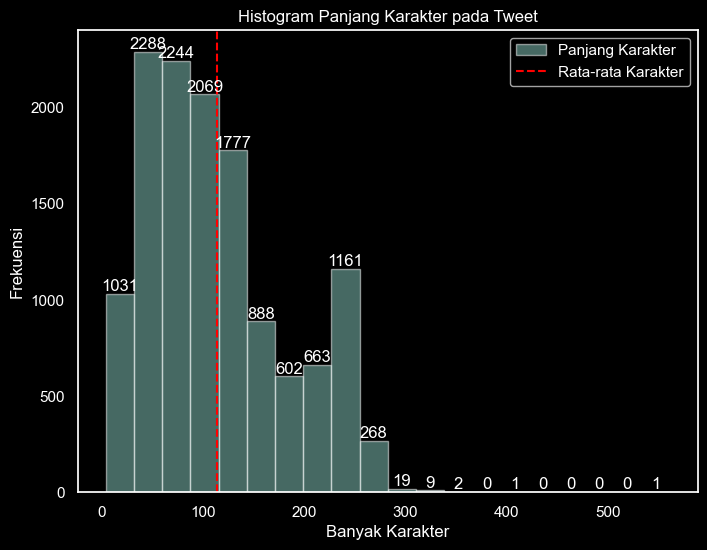

In [258]:
#menghitung rataan panjang karakter tiap tweet
rataan_karakter = df_data_clean['Panjang Tweet'].mean()
rataan_jumlahkata = df_data_clean['Jumlah Kata'].mean ()

#menampilkan hasil
print("Rata-rata panjang karakter tweet: ", rataan_karakter,"kata")
print("Rata-rata jumlah kata pada tweet: ", rataan_jumlahkata ," kata" )

# Membuat histogram
plt.figure(figsize=(8, 6))  # Mengatur ukuran figure
plt.hist(df_data_clean['Panjang Tweet'], bins=20, alpha=0.5, label='Panjang Karakter')
plt.axvline(rataan_karakter, color='red', linestyle='dashed', linewidth=1.5, label='Rata-rata Karakter')
plt.xlabel('Banyak Karakter')
plt.ylabel('Frekuensi')
plt.title('Histogram Panjang Karakter pada Tweet')
plt.legend()

# Menambahkan angka di atas setiap bar
for rect in plt.gca().patches:
    height = rect.get_height()
    plt.gca().annotate(f'{height:.0f}', (rect.get_x() + rect.get_width() / 2, height), ha='center', va='bottom')

plt.show()
plt.show()

Dari analisis tersebut dapat dilihat rata-rata panjang karakter pada tweet sekitar 114 kata.

In [253]:
# Membuat kolom baru di 'df_data_clean' untuk setiap kata dalam tabel 'ABUSIVE' yang tedapat di df_abusive
for ABUSIVE in df_abusive['ABUSIVE']:
    df_data_clean.loc[:, ABUSIVE] = df_data_clean['Tweet'].str.contains(ABUSIVE, case=False)

# Menghitung jumlah kemunculan kata-kata dalam 'df_data_clean'
jumlah_kata_abusive = df_data_clean[df_data_clean.columns[df_data_clean.columns.isin(df_abusive['ABUSIVE'])]].sum()

# Menampilkan hasil
print(jumlah_kata_abusive)

alay            61
ampas           35
buta           143
keparat         41
anjing         142
              ... 
rezim          332
sange           31
serbet           5
sipit          163
transgender     26
Length: 125, dtype: int64


### Analisis Kategori dan Tingkatan Hate Speech Pada Tweet

* Membuat Histogram Perbandingan Kategori Hate Speech

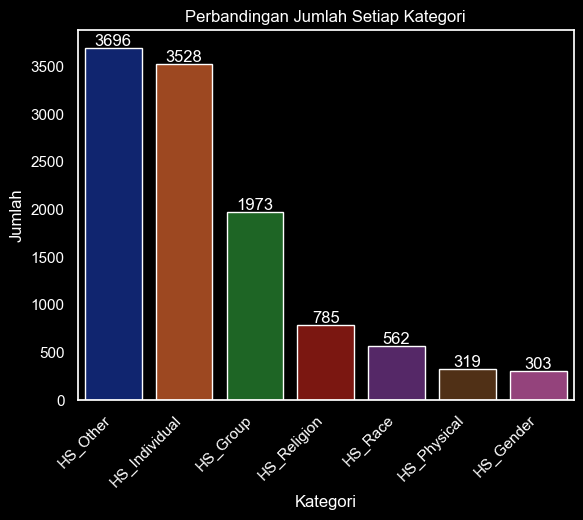

In [247]:
import seaborn as sns
import matplotlib.pyplot as plt

# Mengambil kolom yang ingin ditampilkan dalam histogram
columns = ['HS_Individual', 'HS_Group', 'HS_Religion', 'HS_Race', 'HS_Physical', 'HS_Gender', 'HS_Other']

# Menghitung jumlah masing-masing kolom
counts = df_data_clean[columns].sum()

# Mengurutkan jumlah secara menurun
counts_sorted = counts.sort_values(ascending=False)

# Membuat palet warna gradasi dari tergelap hingga terang berdasarkan urutan jumlah
color_palette = sns.color_palette("dark", len(counts_sorted))

# Membuat histogram dengan seaborn
ax = sns.barplot(x=counts_sorted.index, y=counts_sorted.values, palette=color_palette)

# Mengatur label pada sumbu x agar lebih mudah dibaca
plt.xticks(rotation=45, ha='right')

# Menampilkan judul dan label pada sumbu x dan y
plt.title("Perbandingan Jumlah Setiap Kategori")
plt.xlabel("Kategori")
plt.ylabel("Jumlah")

# Menampilkan jumlah di atas setiap bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Menampilkan histogram
plt.show()


Dari Histogram diatas, dapat disimpulkan Hate Speech yang mengarah kepada individu memiliki frekuensi muncul cukup banyak diantara kategori HS lainnya dengan jumlah 3.528 tweet.

* Membuat Pie Chart Untuk Perbandingan Presentase Setiap Tingkatan Hate Speech

Selanjutnya adalah membandingkan Tingkatan Hate Speech untuk setiap tweet.

Pada dataset, terdapat Kolom HS_Strong, HS_Moderate, dan HS_Weak yang menunjukan tingkatan Hate Speech dari setiap tweet.

In [248]:
# Menghitung jumlah setiap HS_Weak, HS_Strong, dan HS_Moderate
jumlah_HS_Weak = df_data_clean['HS_Weak'].value_counts()[1]
jumlah_HS_Strong = df_data_clean['HS_Strong'].value_counts()[1]
jumlah_HS_Moderate = df_data_clean['HS_Moderate'].value_counts()[1]

# Menampilkan hasil
print("Jumlah HS_Weak:", jumlah_HS_Weak)
print("Jumlah HS_Strong:", jumlah_HS_Strong)
print("Jumlah HS_Moderate:", jumlah_HS_Moderate)

Jumlah HS_Weak: 3336
Jumlah HS_Strong: 471
Jumlah HS_Moderate: 1694


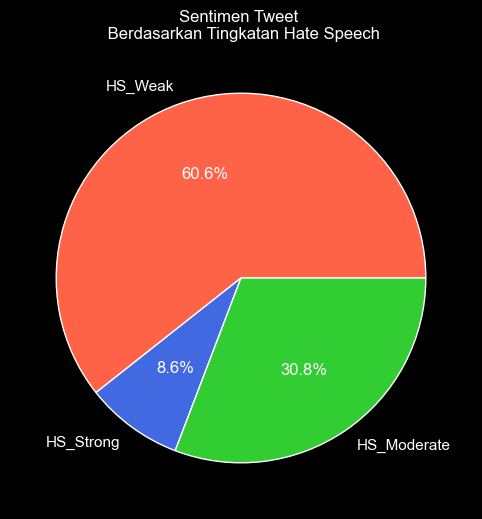

In [249]:
# Menghitung presentase masing-masing kategori HS
total_sentimen = len(df_data_clean)
percentage_HS_Weak = df_data_clean['HS_Weak'].sum() / total * 100
percentage_HS_Strong = df_data_clean['HS_Strong'].sum() / total * 100
percentage_HS_Moderate = df_data_clean['HS_Moderate'].sum() / total * 100

# Membuat DataFrame untuk pie chart
data_sentimen = {
    'Category': ['HS_Weak', 'HS_Strong', 'HS_Moderate'],
    'Percentage': [percentage_HS_Weak, percentage_HS_Strong, percentage_HS_Moderate]
}
pie = pd.DataFrame(data_sentimen)

# Mengatur gaya visualisasi
plt.style.use('dark_background')

# Membuat pie chart
plt.figure(figsize=(8, 6))
plt.pie(pie['Percentage'], labels=pie['Category'], autopct='%1.1f%%', colors=['tomato', 'royalblue', 'limegreen'])
plt.title('Sentimen Tweet \n Berdasarkan Tingkatan Hate Speech')

# Menampilkan pie chart
plt.show()


Dari hasil analisis yang dilakukan, dapat dilihat kebanyakan tweet cenderung memiliki tingkatan Hate Speech yang rendah dengan presentase sebanyak 60,6%

### Analisis Kata-Kata Abusive yang Paling Sering Muncul Pada Tweet

* Membuat Histogram yang Menampilkan 30 Kata Abusive Paling Sering Muncul

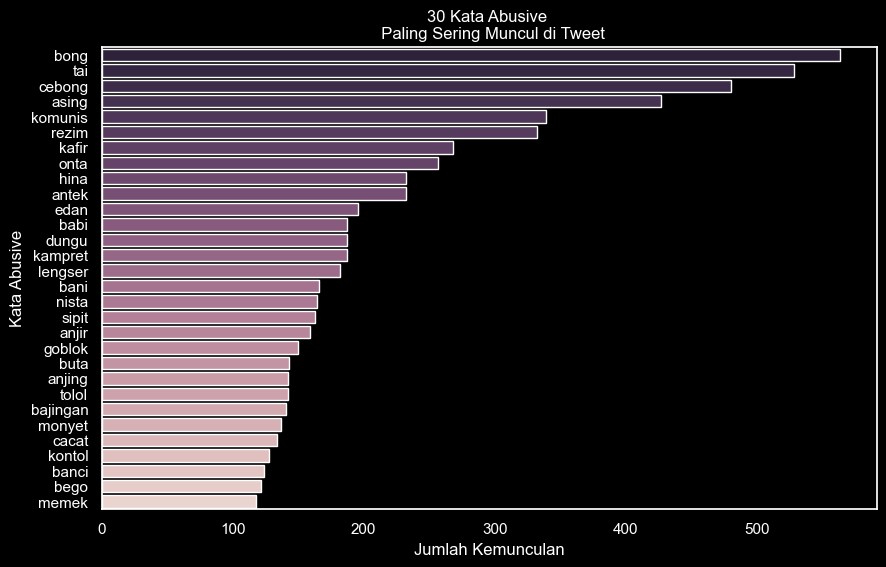

In [250]:
# Mengurutkan kata-kata abusive berdasarkan jumlah kemunculannya
sorted_abusive_words = jumlah_kata_abusive.sort_values(ascending=False)

# Mengambil 30 teratas kata-kata abusive
top_30_abusive_words = sorted_abusive_words.head(30)

# Membuat palet warna gradasi dari warna gelap ke terang
cmap = sns.cubehelix_palette(n_colors=30, reverse=True)

# Membuat plot histogram dengan warna berdasarkan jumlah kemunculan
plt.figure(figsize=(10, 6))
sns.barplot(x=top_30_abusive_words.values, y=top_30_abusive_words.index, palette=cmap)

# Mengatur judul dan label pada sumbu
plt.title('30 Kata Abusive \n  Paling Sering Muncul di Tweet')
plt.xlabel('Jumlah Kemunculan')
plt.ylabel('Kata Abusive')

# Menampilkan plot histogram
plt.show()

* Membuat Wordcloud yang Menampilkan Kata-Kata Abusive Paling Sering Muncul

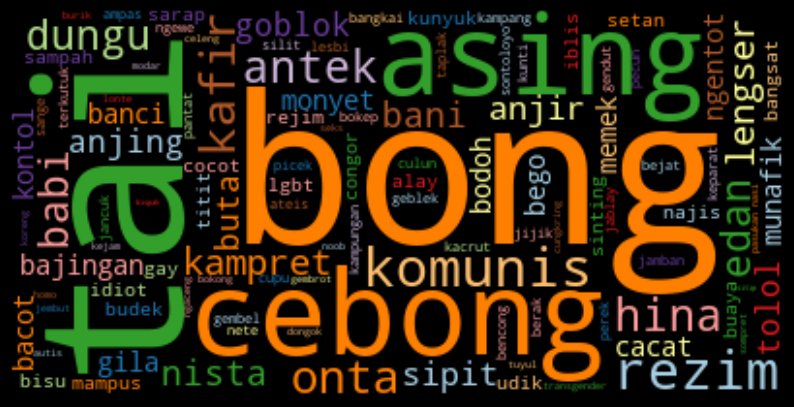

In [251]:
# Membuat wordcloud dari kata-kata abusive yang sering muncul
wordcloud = WordCloud(background_color='black', colormap='Paired', prefer_horizontal=0.8,
                      max_words=300).generate_from_frequencies(jumlah_kata_abusive)

# Menampilkan wordcloud menggunakan seaborn
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Dari hasil analisis yang dilakukan, dapat dilihat kata "bong" memiliki jumlah kemunculan paling banyak pada tweet, dilanjutkan dengan kata "tai", "cebong", dst.

Menampilkan 10 Tweet dengan Jumlah Label Terbanyak

In [252]:

# Mengurutkan dataframe berdasarkan Total Label secara menurun
df_twt_sorted= df_data_clean.sort_values('Total Label', ascending=False)

# Mengambil 10 tweet dengan Total Label terbanyak
top_10_tweets = df_twt_sorted['Tweet'].head(10)

jumlah_label = row['Total Label']

# Menampilkan 10 tweet
for i, tweet in enumerate(top_10_tweets, start=1):
    tweet = clean_non_alphanumeric(tweet)
    print(f"Tweet {i}: {tweet}")
    print("Jumlah Label:", jumlah_label)


Tweet 1: USER Hauahahaha muke banci kecoa kafir zxf0x9fx98x82xf0x9fxa4xa3
Jumlah Label: 7
Tweet 2: USER HUAHAHAHA KAFIR PLONGA PLONGO NIH MUKE BANCI SALON xf0x9fx98x82xf0x9fxa4xa3xf0x9fx98x85xf0x9fx98x86 URL
Jumlah Label: 7
Tweet 3: USER USER USER USER USER USER Bambang muka kontol Loe hina ulama gue hajar Dasar antek komunis
Jumlah Label: 7
Tweet 4: USER heh kontol jan sok pemes lu di rp muka kek memek org tua lu kek monyet agama lu aje agama kontol 35
Jumlah Label: 7
Tweet 5: USER KRISTUS ANJING ASU JIAMPUT KEPARAT PICEK TELEK PEJUH SIWUK KOTANG SIWUK IDIOT KEPARAT PICEK TELEK PEJUH SIWUK KOTANG SIWUK IDIOT KEPARAT PICEK TELEK PEJUH SIWUK KOTANG SIWUK IDIOT KEPARAT PICEK TELEK PEJUH SIWUK KOTANG SIWUK IDIOT KEPARAT PICEK TELEK PEJUH SIWUK K
Jumlah Label: 7
Tweet 6: USER heh kontol jan sok pemes lu di rp muka kek memek org tua lu kek monyet agama lu aje agama kontol 9
Jumlah Label: 7
Tweet 7: Kita habishabisan aja bang Usir kafir  cina dari nusantara merekalah racun akidah tukang sogo